In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('Street_Sweeping_Schedule.csv')

df['sweep_duration'] = df['ToHour'] - df['FromHour']

df['Line'].fillna("", inplace=True)

def extract_first_lat_long(messy_string):
    if messy_string == "":
        return ""
    
    new_string = messy_string.replace("LINESTRING ", "")
    
    new_string = new_string.split(", ")[0][1:]
    
    new_string = new_string[1:34]
    
    lat_long = new_string.split(" ")[::-1]
    
    lat_long = [float(i) for i in lat_long]
    
    lat, long = lat_long[0], lat_long[1]
    
    return (lat, long)

df['lat_long'] = df['Line'].apply(lambda x: extract_first_lat_long(x))
df[['lat', 'long']] = pd.DataFrame(df['lat_long'].to_list())

color_dict = {'Mon': 'r',
            'Tues': 'b',
            'Wed': 'g',
            'Thu': 'k',
            'Fri': 'y',
            'Sat': 'm',
            'Sun': 'c',
            'Holiday': 'k'}

In [103]:
df.head()

,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,...,Week3,Week4,Week5,Holidays,BlockSweepID,Line,sweep_duration,lat_long,lat,long
0,12043000,Sparta St,Ankeny St - Harkness Ave,R,West,Friday,Fri,12,15,1,...,1,1,1,0,1611118,"LINESTRING (-122.403554923986 37.718336652479,...",3,"(37.718336652479, 122.403554923986)",37.718337,122.403555
1,13148101,Van Ness Ave,Golden Gate Ave - Turk St,L,West,Tuesday,Tues,2,6,1,...,1,1,1,0,1598891,"LINESTRING (-122.420439517797 37.781030842108,...",4,"(37.781030842108, 122.420439517797)",37.781031,122.420440
2,10213000,Palos Pl,Crestlake Dr - Sloat Blvd,L,East,"Mon 1st, 3rd, 5th",Mon,9,11,1,...,1,0,1,0,1615904,"LINESTRING (-122.485015094489 37.735082263418,...",2,"(37.735082263418, 122.485015094489)",37.735082,122.485015
3,13499000,Wawona St,45th Ave - 46th Ave,L,South,"Tue 2nd, 4th, 5th",Tues,7,8,0,...,0,1,1,0,1640202,"LINESTRING (-122.503157281209 37.736229168123,...",1,"(37.736229168123, 122.503157281209)",37.736229,122.503157
4,12146000,Steiner St,Pacific Ave - Broadway,L,West,Wed 1st & 3rd,Wed,11,13,1,...,1,0,0,0,1611173,"LINESTRING (-122.436381034464 37.793136720893,...",2,"(37.793136720893, 122.436381034464)",37.793137,122.436381


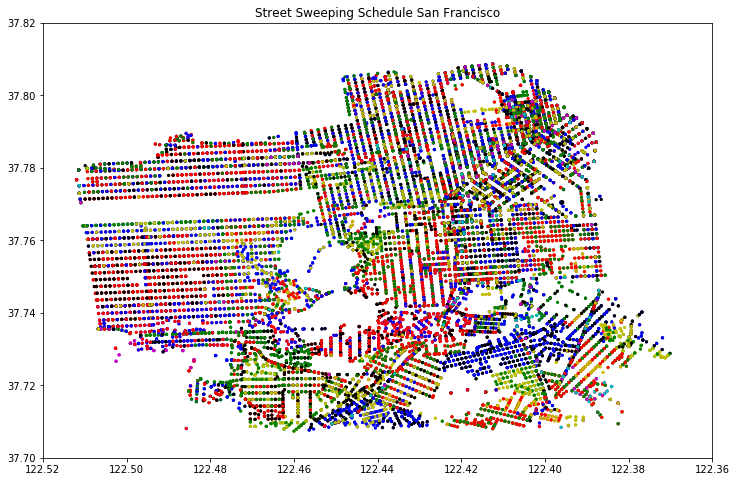

In [115]:
plt.figure(figsize=(12,8))
plt.scatter(x=df['long'],\
            y=df['lat'],\
            s=5,
            c=df['WeekDay'].apply(lambda x: color_dict[x]))
plt.xlim(122.52, 122.36)
plt.ylim(37.70, 37.82)
plt.title("Street Sweeping Schedule San Francisco");

In [111]:
color_dict

{'Mon': 'r',
 'Tues': 'b',
 'Wed': 'g',
 'Thu': 'k',
 'Fri': 'y',
 'Sat': 'm',
 'Sun': 'c',
 'Holiday': 'k'}